In [137]:
import csv
import pandas as pd 
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import SGDClassifier 
import matplotlib.pyplot as plt


In [143]:
data = pd.read_csv("sourceDataML/vmpfc728.csv",header=None) 

In [144]:
data.shape

(8845, 729)

In [117]:
for i in range(476):
    data = data.drop([i], axis=1)

In [118]:
for i in range(751):
    if i <566:
        continue
    data = data.drop([i], axis=1)

In [145]:
dataALL= data.to_numpy()

In [57]:

clf = AdaBoostClassifier(n_estimators=100, random_state=0)

data

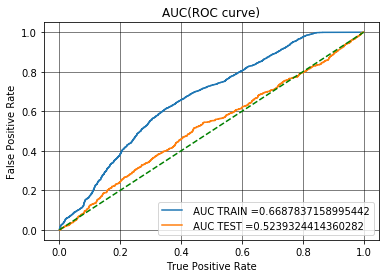

In [146]:
#DATA segementation
x = dataALL[:,0:dataALL.shape[1]-2]
y = dataALL[:,dataALL.shape[1]-1]
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.3, random_state=42)


# model = SGDClassifier(loss='hinge',alpha = 0.0005,class_weight='balanced')
# model.fit(x_train, y_train)
#model = AdaBoostClassifier(n_estimators=40, random_state=0)
model = svm.SVC(C = .3,kernel = 'rbf',gamma='auto')
model.fit(x_train, y_train) 
y_train_pred = model.decision_function(x_train)    
y_test_pred = model.decision_function(x_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [125]:
#SVM
#Adaboost
kf = KFold(n_splits=5)
kf.get_n_splits(x)
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clfSVM = svm.SVC(kernel = 'poly',gamma='auto').fit(X_train, y_train)
    inAccuSVM = clfSVM.score(X_train, y_train)
    outAccuSVM = clfSVM.score(X_test, y_test)
    print("in sample:", str(inAccuSVM),"out of sample:", str(outAccuSVM))



TRAIN: [1387 1388 1389 ... 6932 6933 6934] TEST: [   0    1    2 ... 1384 1385 1386]
in sample: 0.613013698630137 out of sample: 0.5746214852198991
TRAIN: [   0    1    2 ... 6932 6933 6934] TEST: [1387 1388 1389 ... 2771 2772 2773]
in sample: 0.6135544340302812 out of sample: 0.5767844268204758
TRAIN: [   0    1    2 ... 6932 6933 6934] TEST: [2774 2775 2776 ... 4158 4159 4160]
in sample: 0.6142754145638067 out of sample: 0.5760634462869503
TRAIN: [   0    1    2 ... 6932 6933 6934] TEST: [4161 4162 4163 ... 5545 5546 5547]
in sample: 0.6177000720980533 out of sample: 0.5717375630857967
TRAIN: [   0    1    2 ... 5545 5546 5547] TEST: [5548 5549 5550 ... 6932 6933 6934]
in sample: 0.6081470800288392 out of sample: 0.6041816870944484


In [89]:
#Adaboost
kf = KFold(n_splits=5)
kf.get_n_splits(x)
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clfAda = AdaBoostClassifier(n_estimators=70, random_state=0)
    clfAda.fit(X_train, y_train)
    AdaBoostClassifier(n_estimators=100, random_state=0)
    inAccuAda = clfAda.score(X_train, y_train)
    outAccuAda = clfAda.score(X_test, y_test)
    print("in sample:", str(inAccuAda),"out of sample:", str(outAccuAda))

TRAIN: [1387 1388 1389 ... 6932 6933 6934] TEST: [   0    1    2 ... 1384 1385 1386]
in sample: 0.6294160057678443 out of sample: 0.5717375630857967
TRAIN: [   0    1    2 ... 6932 6933 6934] TEST: [1387 1388 1389 ... 2771 2772 2773]
in sample: 0.6250901225666907 out of sample: 0.5760634462869503
TRAIN: [   0    1    2 ... 6932 6933 6934] TEST: [2774 2775 2776 ... 4158 4159 4160]
in sample: 0.6281542898341744 out of sample: 0.5739005046863734
TRAIN: [   0    1    2 ... 6932 6933 6934] TEST: [4161 4162 4163 ... 5545 5546 5547]
in sample: 0.6294160057678443 out of sample: 0.5739005046863734
TRAIN: [   0    1    2 ... 5545 5546 5547] TEST: [5548 5549 5550 ... 6932 6933 6934]
in sample: 0.6330209084354722 out of sample: 0.5832732516222062


In [49]:
#logit
clf = LogisticRegression(random_state=0).fit(x, y)
x

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[ 0.32437 ,  0.12257 ,  0.20188 , ...,  0.3938  ,  0.38968 ,
         0.70902 ],
       [ 1.7253  , -0.93175 ,  0.13045 , ..., -1.5317  , -1.2962  ,
        -0.048017],
       [ 4.7329  ,  3.0849  ,  2.1714  , ...,  2.6919  ,  2.2268  ,
         1.5752  ],
       ...,
       [-0.24858 ,  0.22187 ,  0.2415  , ...,  0.3202  ,  0.21306 ,
         0.49529 ],
       [-0.45223 ,  0.46593 , -0.91491 , ..., -0.025303,  0.088508,
        -0.83938 ],
       [-0.38674 , -1.1102  , -0.83282 , ..., -0.55938 ,  0.52231 ,
        -0.11654 ]])

In [52]:
x.shape

(6935, 119)